In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import squarify

## Data Cleaning

In [4]:
df = pd.read_csv('data/PhillySpending.csv')

#Basic Data Cleaning

#Check for missing values and handle them if necessary
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical
        df[column] = df[column].fillna('Unknown')
    else:  # Numerical
        df[column] = df[column].fillna(df[column].median())

#Deal with duplicates (if they are indeed unwanted)
df = df.drop_duplicates()



In [5]:



department21 = df.groupby('dept_name')['2021 (Proposed)'].sum().sort_values()
department22 = df.groupby('dept_name')['2022 (Proposed)'].sum().sort_values()
department23 = df.groupby('dept_name')['2023 (Proposed)'].sum().sort_values()
department24 = df.groupby('dept_name')['2024 (Proposed)'].sum().sort_values()

expense21 = df.groupby('category_code_description')['2021 (Proposed)'].sum().sort_values()
expense22 = df.groupby('category_code_description')['2022 (Proposed)'].sum().sort_values()
expense23 = df.groupby('category_code_description')['2023 (Proposed)'].sum().sort_values()
expense24 = df.groupby('category_code_description')['2024 (Proposed)'].sum().sort_values()

## Tree Graph for Philly Spending by Department

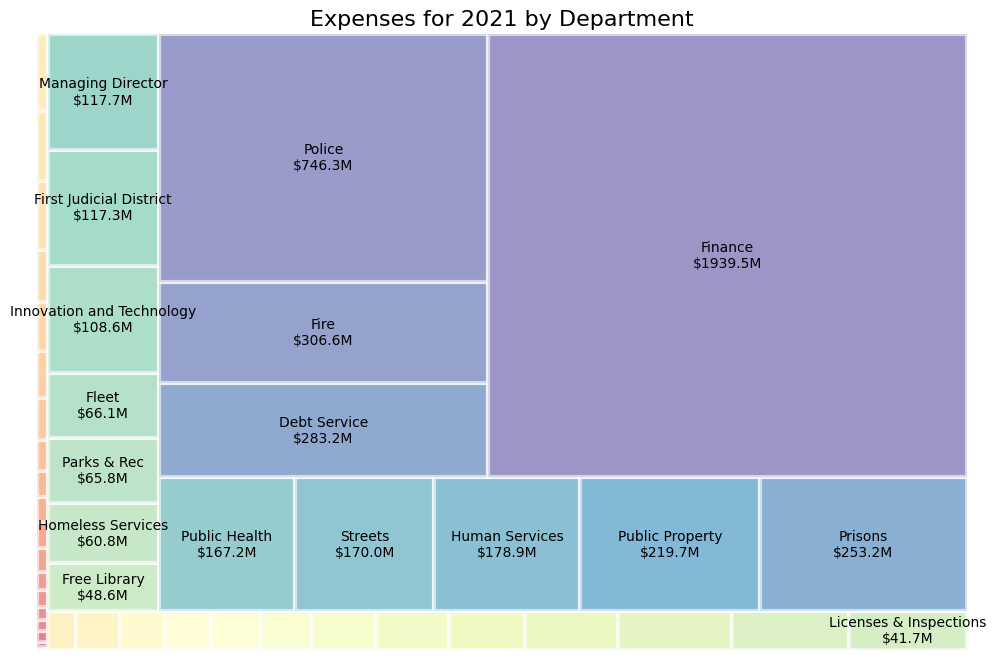

In [6]:
#FY21
department_expenses = department21.to_dict()

# Remove entries with 0 values
department_expenses = {k: v for k, v in department_expenses.items() if v > 0}

# New dictionary with 'Department' removed from keys


# Extract sizes and labels
sizes = list(department_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.5 else ''  # Adjust the 10 here to your preferred threshold
          for k, v in department_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2021 by Department', fontsize=16)
plt.axis('off')

# Show plot
plt.show()

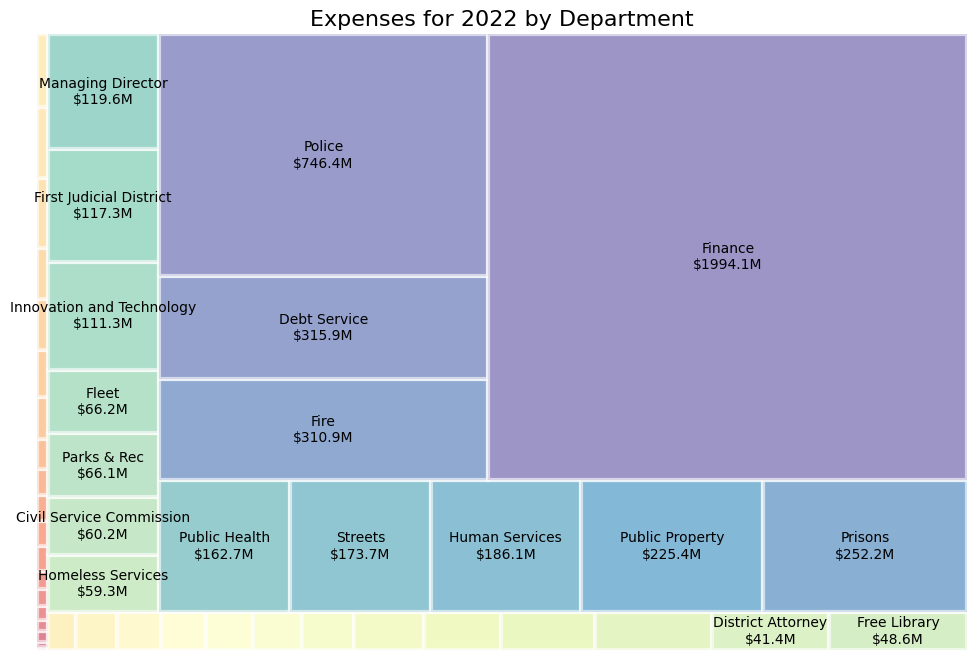

In [7]:
#FY22
department_expenses = department22.to_dict()

# Remove entries with 0 values
department_expenses = {k: v for k, v in department_expenses.items() if v > 0}

# New dictionary with 'Department' removed from keys


# Extract sizes and labels
sizes = list(department_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.3 else ''  # Adjust the 10 here to your preferred threshold
          for k, v in department_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2022 by Department', fontsize=16)
plt.axis('off')

# Show plot
plt.show()

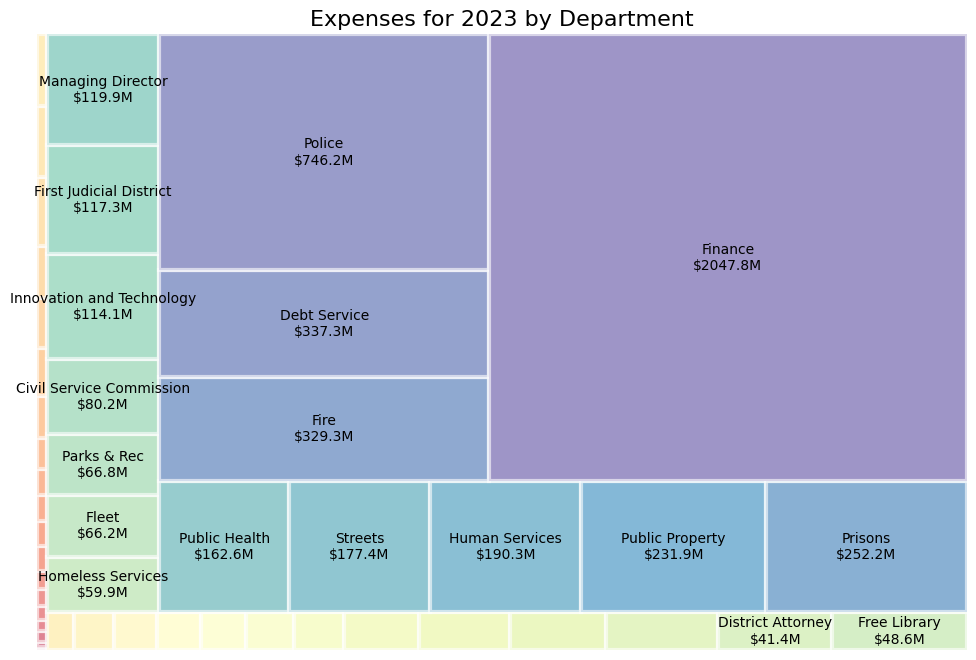

In [8]:
#FY23
department_expenses = department23.to_dict()

# Remove entries with 0 values
department_expenses = {k: v for k, v in department_expenses.items() if v > 0}

# New dictionary with 'Department' removed from keys


# Extract sizes and labels
sizes = list(department_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.3 else ''  # Adjust the 10 here to your preferred threshold
          for k, v in department_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2023 by Department', fontsize=16)
plt.axis('off')

# Show plot
plt.show()

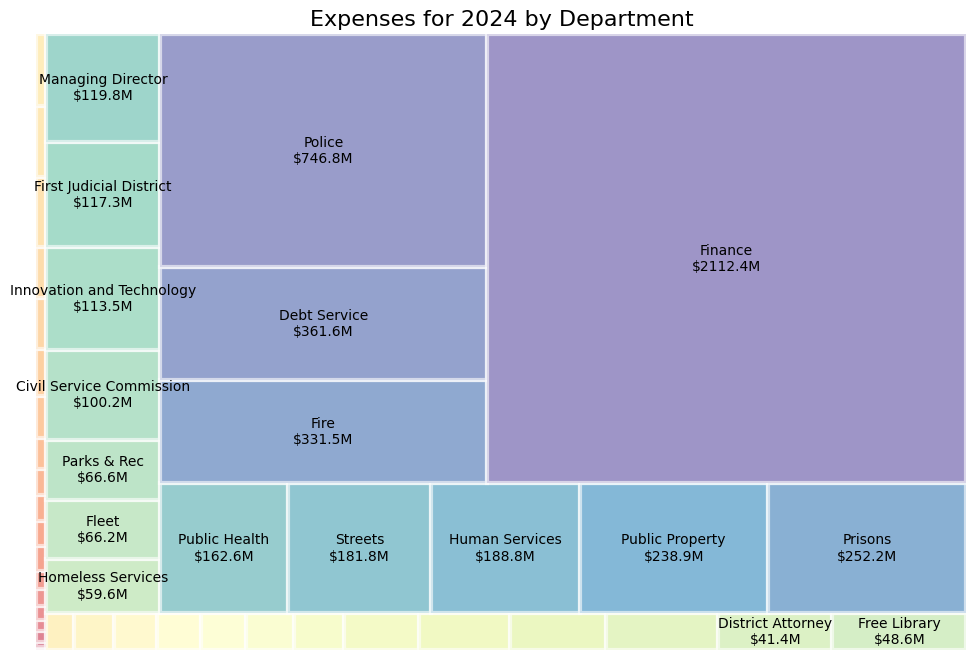

In [9]:
#FY24
department_expenses = department24.to_dict()

# Remove entries with 0 values
department_expenses = {k: v for k, v in department_expenses.items() if v > 0}

# New dictionary with 'Department' removed from keys


# Extract sizes and labels
sizes = list(department_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.3 else ''  # Adjust the 10 here to your preferred threshold
          for k, v in department_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2024 by Department', fontsize=16)
plt.axis('off')

# Show plot
plt.show()

## Pie Charts for Philly Spending by Category

In [10]:
expense24

category_code_description
Legislative & Elections         32867842
City Development                51934431
Regulatory                      72008934
Recreation, Arts & Culture     124443726
Budget Reserves                198480000
Education                      343428366
Infrastructure Services        423108103
Community Services             429323266
Public Safety                 1516171765
Finance & Administration      2422048251
Name: 2024 (Proposed), dtype: int64

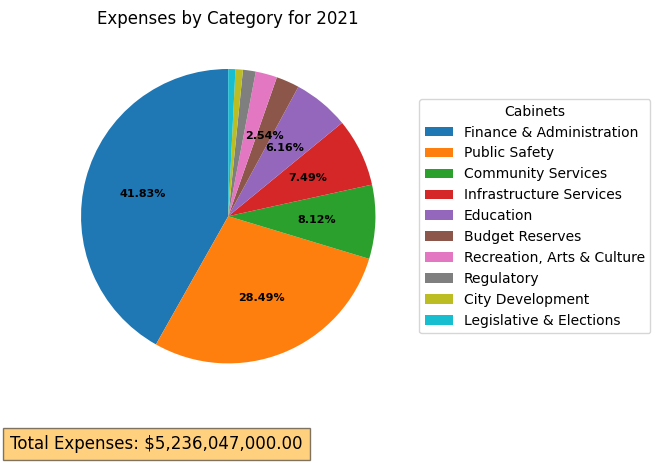

In [11]:
#FY21 Pie Chart

expenses_by_category = {
    'Legislative & Elections':       40743728,
    'City Development':              42816431,
    'Regulatory':                    73440757,
    'Recreation, Arts & Culture':    123613342,
    'Budget Reserves':               133233000,
    'Education':                     322743576,
    'Infrastructure Services':       392116269,
    'Community Services':            425289595,
    'Public Safety':                 1491889166,
    'Finance & Administration':      2190161136,
}


# Prepare data
labels = expenses_by_category.keys()
sizes = expenses_by_category.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_category.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2.4:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Category for 2021')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()

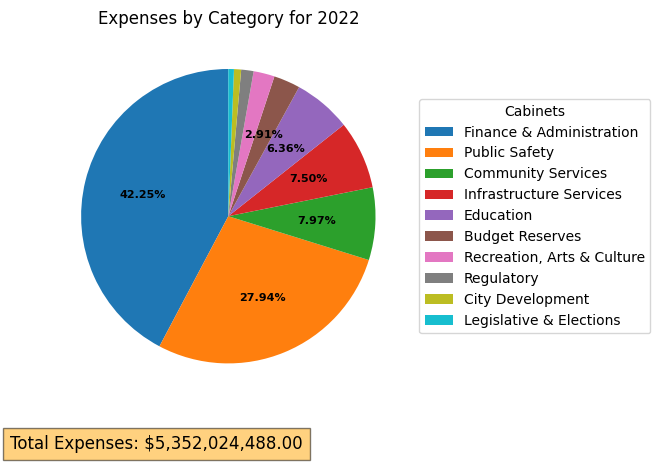

In [12]:
#FY22 Pie Chart

expenses_by_category = {
    'Legislative & Elections':       32731842,
    'City Development':              41926547,
    'Regulatory':                    72765184,
    'Recreation, Arts & Culture':    123932304,
    'Budget Reserves':               155919000,
    'Education':                     340189746,
    'Infrastructure Services':       401594536,
    'Community Services':            426376387,
    'Public Safety':                 1495197513,
    'Finance & Administration':      2261391429,
}

# Prepare data
labels = expenses_by_category.keys()
sizes = expenses_by_category.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_category.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2.4:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Category for 2022')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()

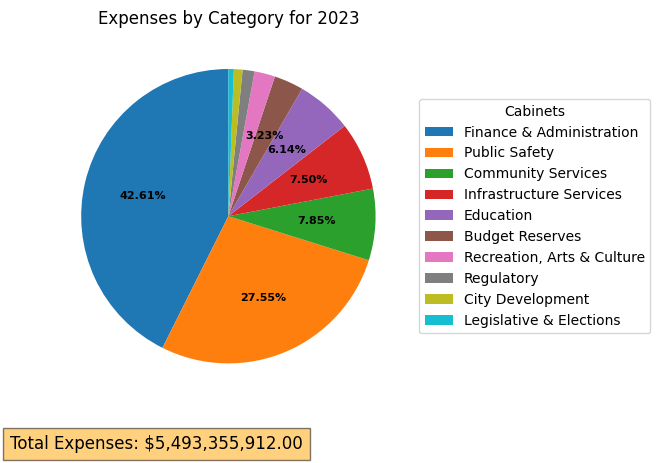

In [13]:
#FY23 Pie Chart

expenses_by_category = {
    'Legislative & Elections':       32731842,
    'City Development':              51925378,
    'Regulatory':                    72008934,
    'Recreation, Arts & Culture':    124575606,
    'Budget Reserves':               177620000,
    'Education':                     337289135,
    'Infrastructure Services':       411875807,
    'Community Services':            431132192,
    'Public Safety':                 1513434495,
    'Finance & Administration':      2340762523,
}

# Prepare data
labels = expenses_by_category.keys()
sizes = expenses_by_category.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_category.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2.4:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Category for 2023')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()

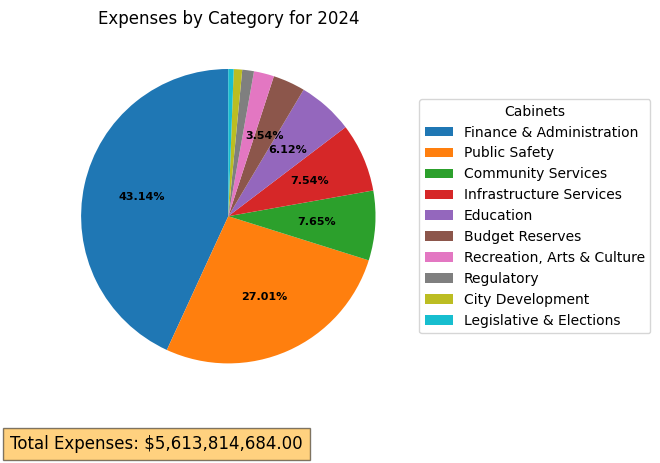

In [14]:
#FY24 Pie Chart

expenses_by_category = {
    'Legislative & Elections':       32867842,
    'City Development':              51934431,
    'Regulatory':                    72008934,
    'Recreation, Arts & Culture':    124443726,
    'Budget Reserves':               198480000,
    'Education':                     343428366,
    'Infrastructure Services':       423108103,
    'Community Services':            429323266,
    'Public Safety':                 1516171765,
    'Finance & Administration':      2422048251,
}

# Prepare data
labels = expenses_by_category.keys()
sizes = expenses_by_category.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_category.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2.4:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Category for 2024')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()

## Bar Chart -> Shows Category Spending Among Years

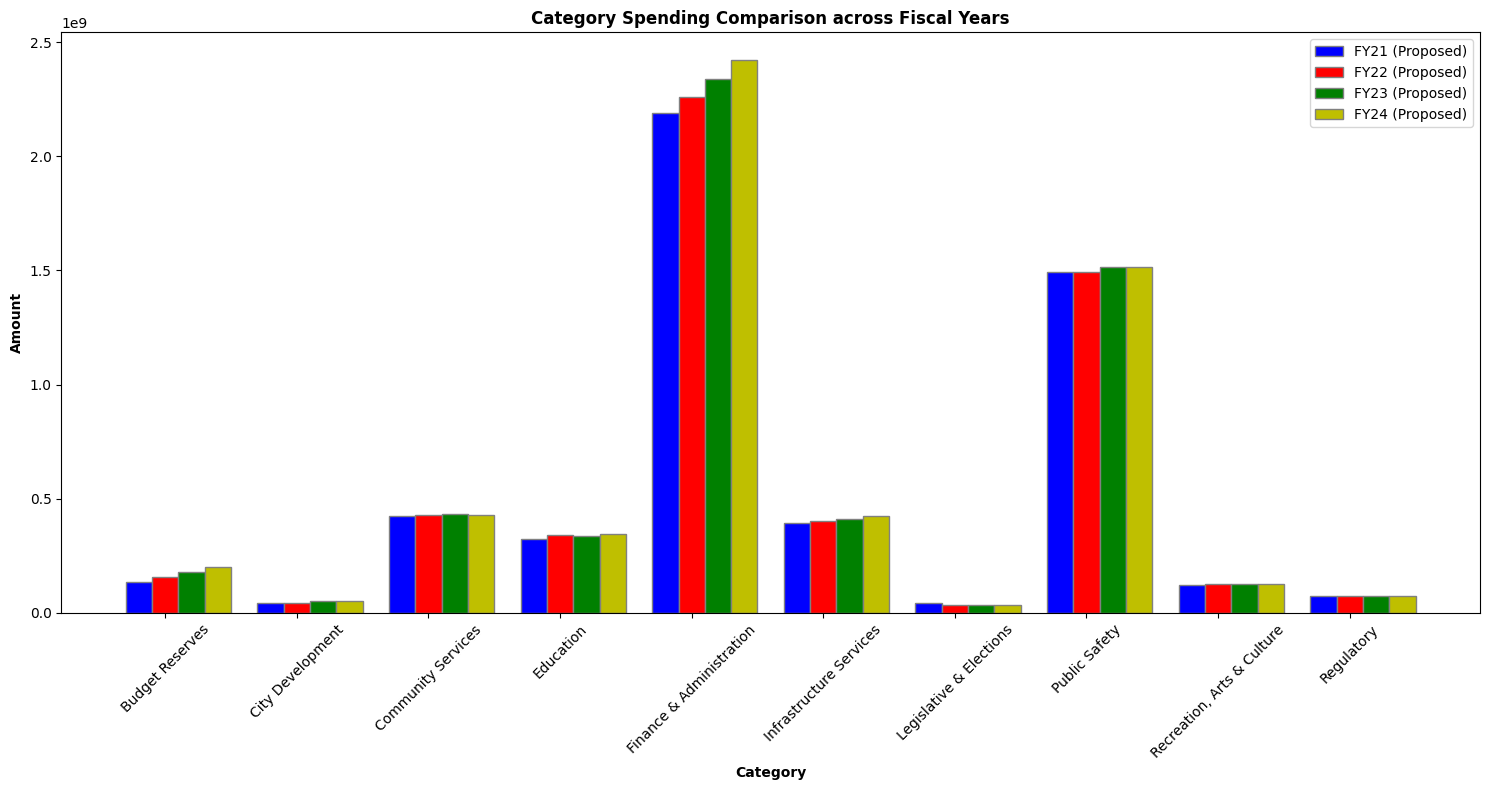

In [15]:
grouped_dset = df.groupby('category_code_description').agg({
    '2021 (Proposed)': 'sum',
    '2022 (Proposed)': 'sum',
    '2023 (Proposed)': 'sum',
    '2024 (Proposed)': 'sum'
}).reset_index()

# Plotting
barWidth = 0.2
r1 = range(len(grouped_dset))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(15, 8))
plt.bar(r1, grouped_dset['2021 (Proposed)'], color='b', width=barWidth, edgecolor='grey', label='FY21 (Proposed)')
plt.bar(r2, grouped_dset['2022 (Proposed)'], color='r', width=barWidth, edgecolor='grey', label='FY22 (Proposed)')
plt.bar(r3, grouped_dset['2023 (Proposed)'], color='g', width=barWidth, edgecolor='grey', label='FY23 (Proposed)')
plt.bar(r4, grouped_dset['2024 (Proposed)'], color='y', width=barWidth, edgecolor='grey', label='FY24 (Proposed)')

# Title & Subtitle
plt.title('Category Spending Comparison across Fiscal Years', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(grouped_dset))], grouped_dset['category_code_description'], rotation=45)
plt.ylabel('Amount', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()

## Line Graph Showing Difference in Total Spending Across Each Year

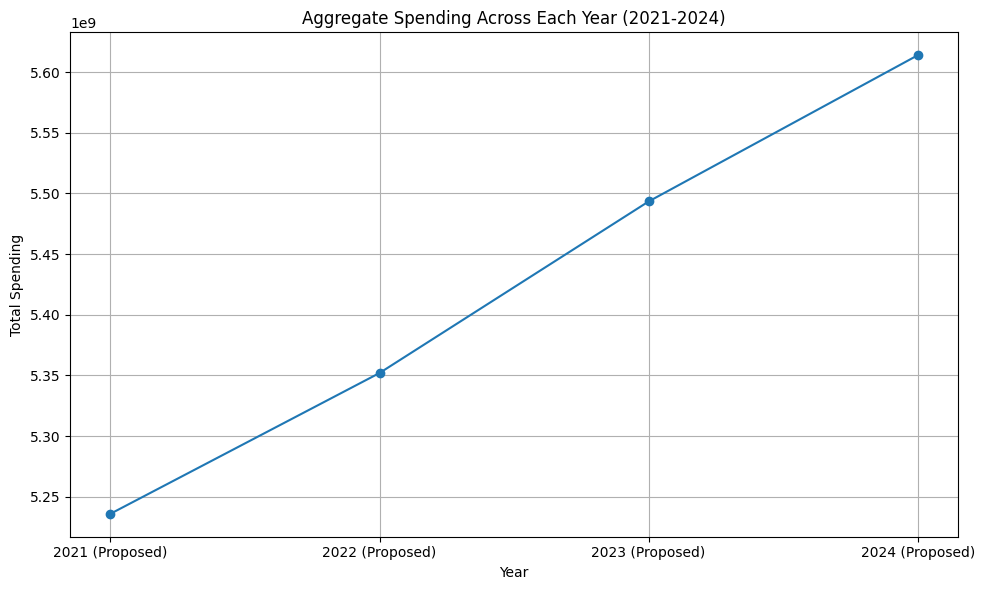

In [16]:
total_spending_by_year = df[['2021 (Proposed)', '2022 (Proposed)', '2023 (Proposed)', '2024 (Proposed)']].sum()

years = total_spending_by_year.index
totals = total_spending_by_year.values

plt.figure(figsize=(10, 6))
plt.plot(years, totals, marker='o')

plt.title('Aggregate Spending Across Each Year (2021-2024)')
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()

## Pie Charts for Philly my Major Class Description

In [55]:
major21 = df.groupby('major_class_description')['2021 (Proposed)'].sum().sort_values()
major22 = df.groupby('major_class_description')['2022 (Proposed)'].sum().sort_values()
major23 = df.groupby('major_class_description')['2023 (Proposed)'].sum().sort_values()
major24 = df.groupby('major_class_description')['2024 (Proposed)'].sum().sort_values()

major24

major_class_description
Payments to Other Funds     109545504
Materials/Equip.            122424420
Advances & Misc.            158356100
Debt Service                242239863
Contrib./Indemnities        414991147
Purchase of Services       1088513943
Personal Services          3477743707
Name: 2024 (Proposed), dtype: int64

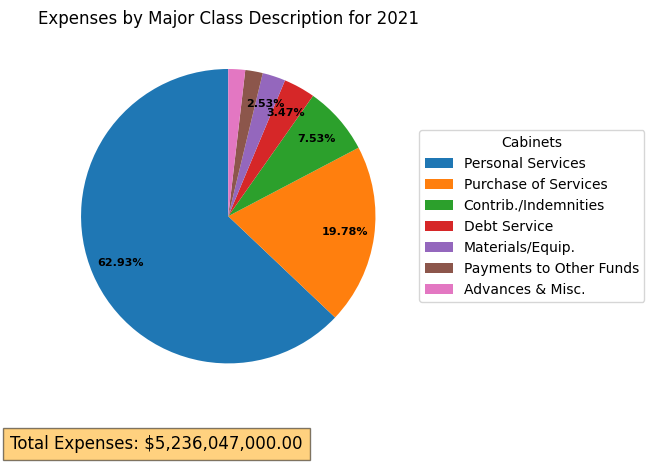

In [47]:
#FY21 Pie Chart

expenses_by_major = {
    'Advances & Misc.':            96705100,
    'Payments to Other Funds':     100461504,
    'Materials/Equip.':            132674816,
    'Debt Service':                181589117,
    'Contrib./Indemnities':        394206357,
    'Purchase of Services':       1035605423,
    'Personal Services':          3294804683,
}

# Prepare data
labels = expenses_by_major.keys()
sizes = expenses_by_major.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_major.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90, pctdistance=0.8)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Major Class Description for 2021')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()



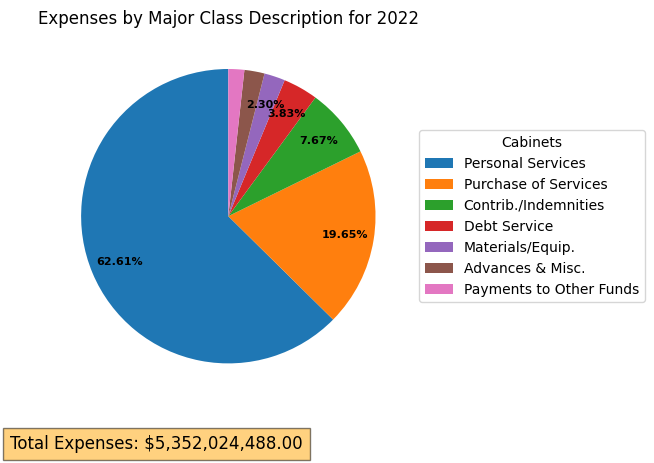

In [50]:
#FY22 Pie Chart

expenses_by_major = {
    'Advances & Misc.':            118356100,
    'Payments to Other Funds':     93412504,
    'Materials/Equip.':            122841108,
    'Debt Service':                204731919,
    'Contrib./Indemnities':        410302527,
    'Purchase of Services':       1051572603,
    'Personal Services':          3350807727,
}

# Prepare data
labels = expenses_by_major.keys()
sizes = expenses_by_major.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_major.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2.22:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90, pctdistance=0.8)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Major Class Description for 2022')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()



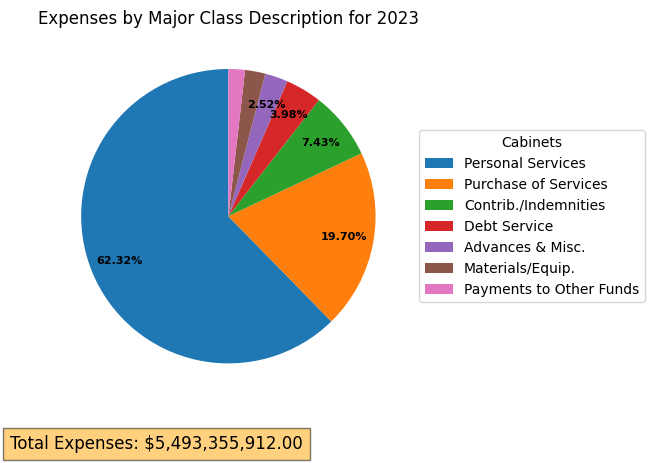

In [54]:
#FY23 Pie Chart

expenses_by_major = {
    'Advances & Misc.':            138356100,
    'Payments to Other Funds':      99520504,
    'Materials/Equip.':            122372381,
    'Debt Service':                218735144,
    'Contrib./Indemnities':        408351916,
    'Purchase of Services':       1082435544,
    'Personal Services':          3423584323,
}

# Prepare data
labels = expenses_by_major.keys()
sizes = expenses_by_major.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_major.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2.24:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90, pctdistance=0.8)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Major Class Description for 2023')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()



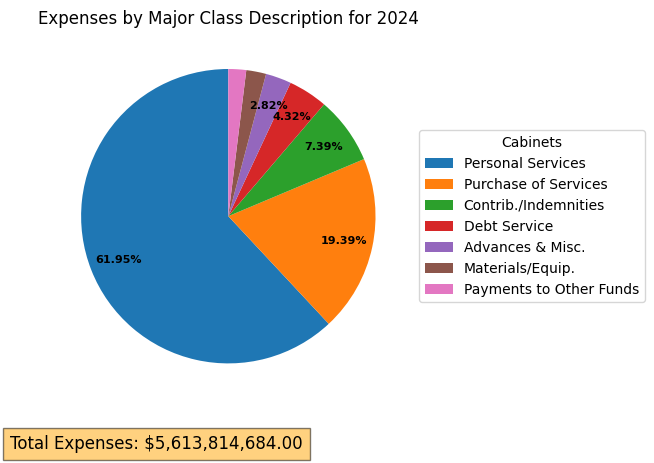

In [57]:
#FY24 Pie Chart

expenses_by_major = {
    'Advances & Misc.':            158356100,
    'Payments to Other Funds':     109545504,
    'Materials/Equip.':            122424420,
    'Debt Service':                242239863,
    'Contrib./Indemnities':        414991147,
    'Purchase of Services':       1088513943,
    'Personal Services':          3477743707,
}

# Prepare data
labels = expenses_by_major.keys()
sizes = expenses_by_major.values()

# Sort the data by sizes (values) from largest to smallest
sorted_items = sorted(expenses_by_major.items(), key=lambda item: item[1], reverse=True)

# Unzip the sorted items into labels and sizes
labels, sizes = zip(*sorted_items)

# Function to format the percentage labels on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 2.24:
            return '{p:.2f}%'.format(p=pct)
        else:
            return ''
    return my_autopct

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light yellow-green
    '#9edae5'   # light blue-teal
    # Add more colors if you have more than 20 slices
]

# Create the pie chart and display the percentages on the pie itself
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors= colors, startangle=90, pctdistance=0.8)

# Make the percentage labels a little bigger
plt.setp(autotexts, size=8, weight="bold", color="black")

# Add a legend without percentages to the right of the plot
ax.legend(wedges, labels, title="Cabinets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title for the pie chart
ax.set_title('Expenses by Major Class Description for 2024')

# Display total expenses at the bottom
plt.figtext(0.3, 0.01, f"Total Expenses: ${sum(sizes):,.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Adjust the plot size to make room for the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()



## Tree Graphs for Philly by Major Class Description

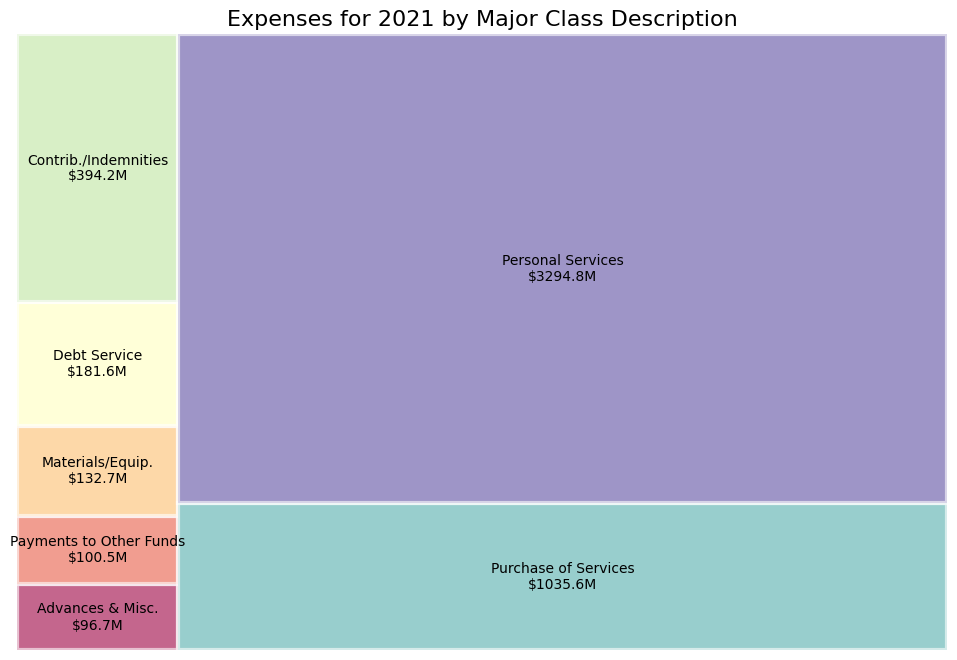

In [60]:
#FY21
major_expenses = major21.to_dict()

# Remove entries with 0 values
major_expenses = {k: v for k, v in major_expenses.items() if v > 0}

# Extract sizes and labels
sizes = list(major_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.5 else ''
          for k, v in major_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2021 by Major Class Description', fontsize=16)
plt.axis('off')

# Show plot
plt.show()

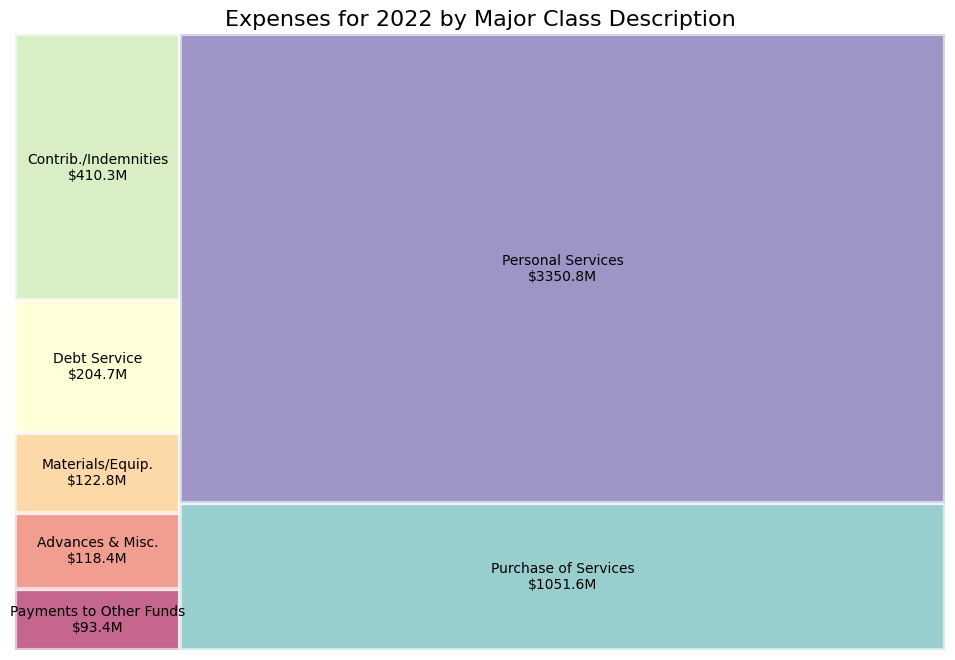

In [62]:
#FY22
major_expenses = major22.to_dict()

# Remove entries with 0 values
major_expenses = {k: v for k, v in major_expenses.items() if v > 0}

# Extract sizes and labels
sizes = list(major_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.5 else ''
          for k, v in major_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2022 by Major Class Description', fontsize=16)
plt.axis('off')

# Show plot
plt.show()

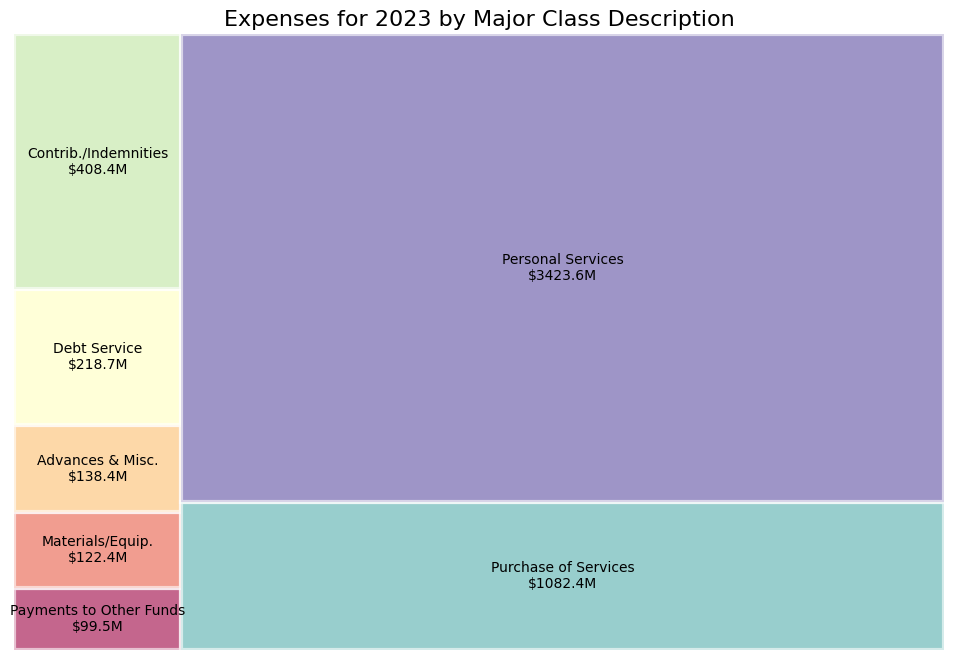

In [63]:
#FY23
major_expenses = major23.to_dict()

# Remove entries with 0 values
major_expenses = {k: v for k, v in major_expenses.items() if v > 0}

# Extract sizes and labels
sizes = list(major_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.5 else ''
          for k, v in major_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2023 by Major Class Description', fontsize=16)
plt.axis('off')

# Show plot
plt.show()

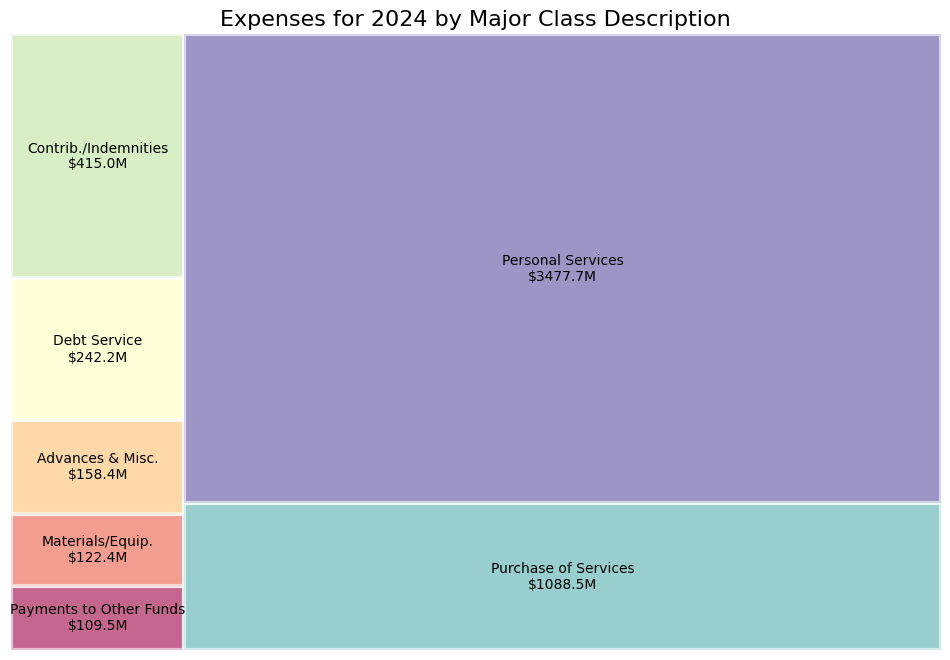

In [64]:
#FY24
major_expenses = major24.to_dict()

# Remove entries with 0 values
major_expenses = {k: v for k, v in major_expenses.items() if v > 0}

# Extract sizes and labels
sizes = list(major_expenses.values())
labels = [f'{k}\n${v / 1e6:.1f}M' if v / 1e6 > 41.5 else ''
          for k, v in major_expenses.items()]

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6, edgecolor="white", linewidth=3)

# Title and axis off
plt.title('Expenses for 2024 by Major Class Description', fontsize=16)
plt.axis('off')

# Show plot
plt.show()